In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np
import regex as reg

%matplotlib inline  

Extracting references from texts:

In [ ]:
!python ./Scripts/reference_extraction.py 

Loading references as previously extracted:

In [2]:
references = pd.read_csv('data/References.csv', index_col=0)

references.head()

,ref,file,ref_parsed,pub_year,year,identifier
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",2018,1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2018,2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",2018,1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",2018,1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2018,2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


Some sample references, and their corresponding identifier:

In [3]:
sample = references[['ref', 'identifier']].sample(4)
_ = [print("Ref: ",r, '\nIdentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

Ref:  Clark, L.S. (2013) The parent app. Oxford, United Kingdom: Oxford University Press. 
Identifier:  Clark, L.S. (2013) The parent app
Ref:  Bell, P., Lewenstein, B., Shouse, A. W., & Feder, M. A. (Eds.). (2009). Learning Science in Informal Environments: People, Places, and Pursuits. National Academies Press. 
Identifier:  Bell, P., Lewenstein, B., Shouse, A. W., & Feder, M. A. (Eds.). (2009). Learning Science in Informal Environments: People, Places, and Pursuits
Ref:  Kawasaki, J., Sandoval, W. A., & Rodriguez, L. (2017). Teachers' ideas about teaching the science practices in the next generation science standards. Paper presented at the NARST Annual Meeting, San Antonio, 
Identifier:  Kawasaki, J., Sandoval, W. A., & Rodriguez, L. (2017). Teachers' ideas about teaching the science practices in the next generation science standards
Ref:  Balmaceda, J. M., Schiaffino, S. N., & Pace, J. A. (2014). Using constraint satisfaction to aid group formation in CSCL. Inteligencia Artificial

### Who is cited the most:

First we check over all years:

Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge                                   32
Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation                                          32
Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice                                             31
Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology                                   23
Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas                                                         20
Barron, B. (2003). When smart groups fail                                                                                      19
Bereiter, C. (2002). Education and mind in the knowledge age                                                                   16
Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes

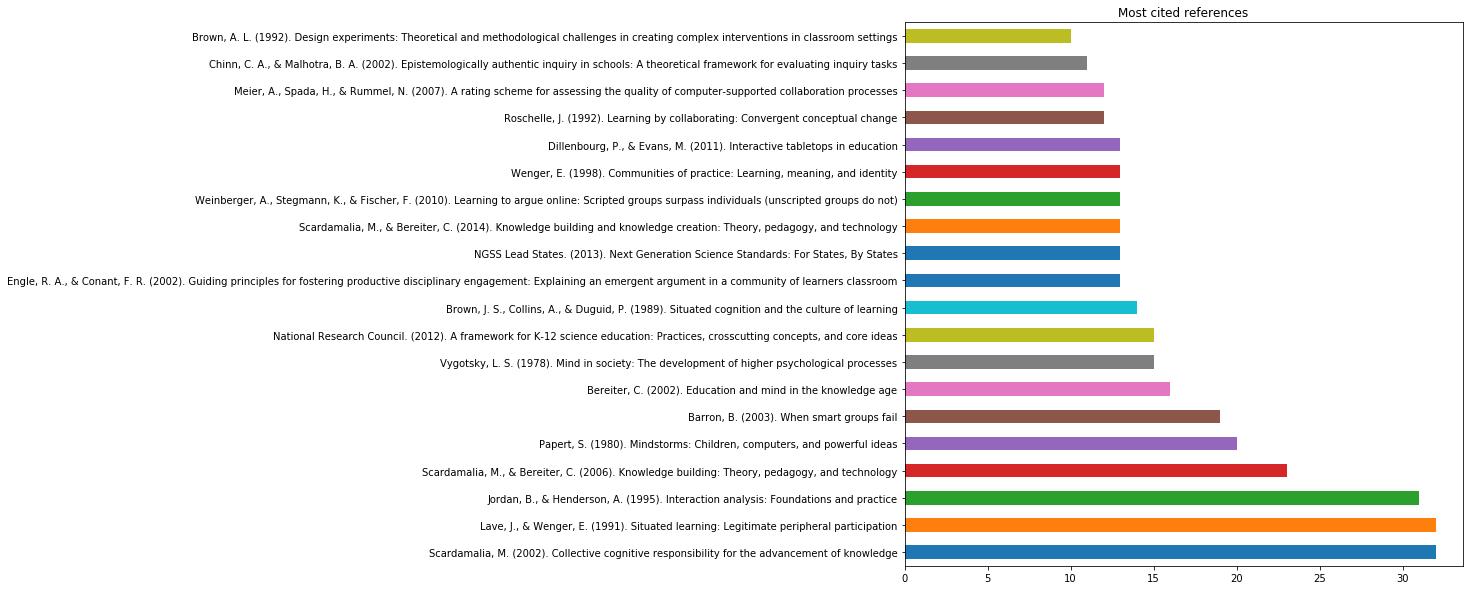

In [4]:
plt.figure(figsize=(10, 10))
plt.title('Most cited references')
references.identifier.value_counts().head(20).plot(kind='barh')
references.identifier.value_counts().head(10)

## Variations in most cited over the years:

Then we look at the different years. A variation over the years could give insights in emerging topics, differences between ICLS and CSCL.

For instance, if we observe the number one most cited text, we see an alternating pattern - maybe those two are very important papers for the two respective conferences!

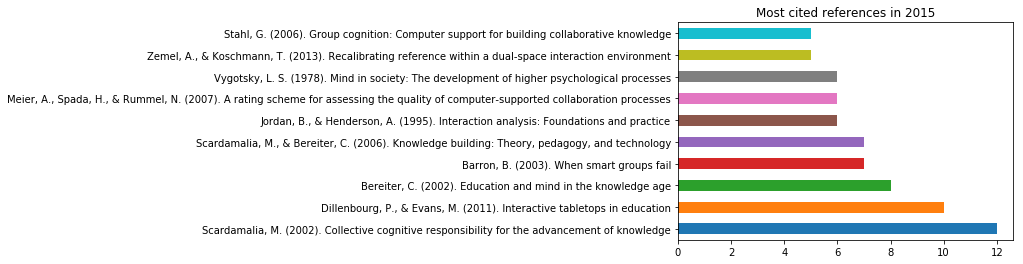

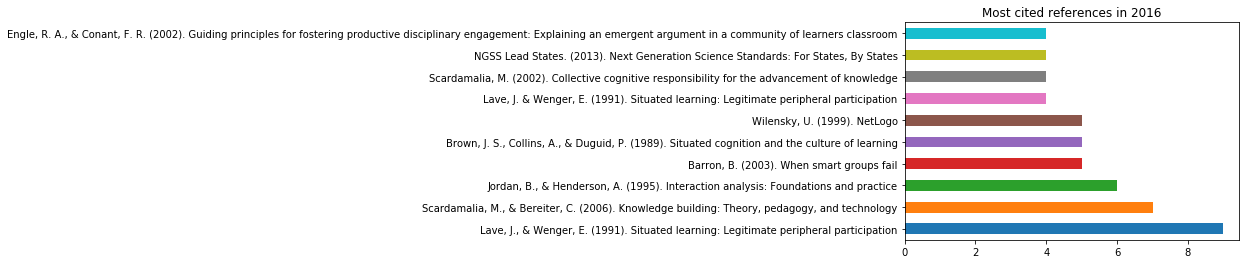

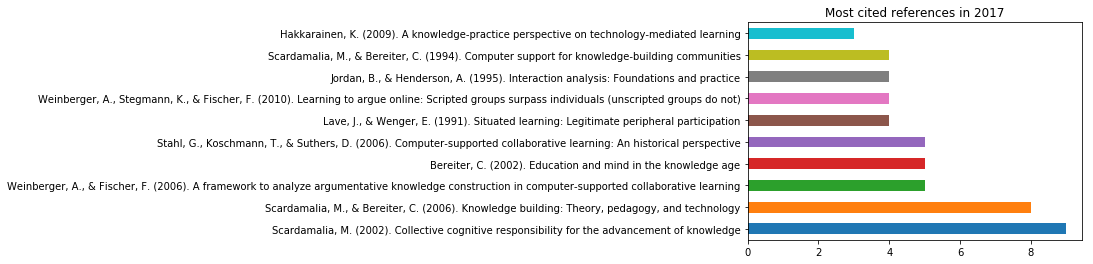

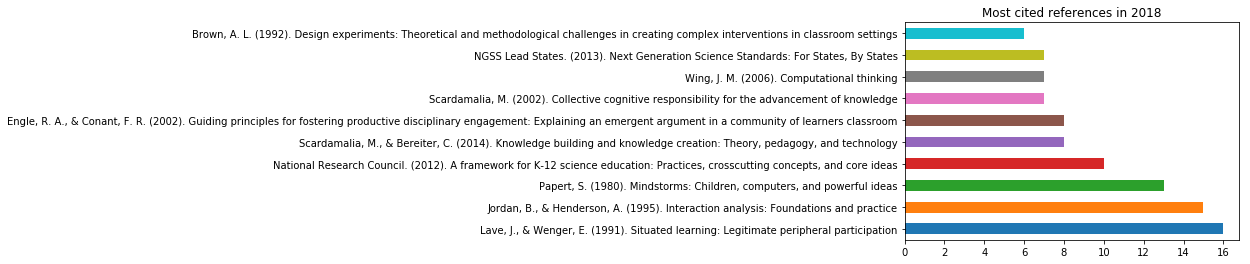

In [5]:
for year in sorted(references.pub_year.unique()):
    plt.title(f'Most cited references in {year}')
    references[references.pub_year == year].identifier.value_counts().head(10).plot(kind='barh')
    plt.show()

### Looking at differences ICLS and CSCL

We decide to look at papers that are cited often and are only cited in ICLS or CSCL (and are cited at those two every ear):

In [6]:
d = dict()
for year in sorted(references.pub_year.unique()):
    d[year] = set(references[references.pub_year == year].identifier.value_counts().head(30).index)

In [7]:
ICLS = d[2018].intersection(d[2016])
CSCL = d[2017].intersection(d[2015])

In [8]:
#Even years - odd years 
ICLS - CSCL

{'Barron, B. (2003). When smart groups fail',
 'Brown, J. S., Collins, A., & Duguid, P. (1989). Situated cognition and the culture of learning',
 'Engle, R. A., & Conant, F. R. (2002). Guiding principles for fostering productive disciplinary engagement: Explaining an emergent argument in a community of learners classroom',
 'Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation',
 'NGSS Lead States. (2013). Next Generation Science Standards: For States, By States',
 'National Research Council. (2012). A framework for K-12 science education: Practices, crosscutting concepts, and core ideas',
 'Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas',
 'Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes',
 'Wenger, E. (1998). Communities of practice: Learning, meaning, and identity'}

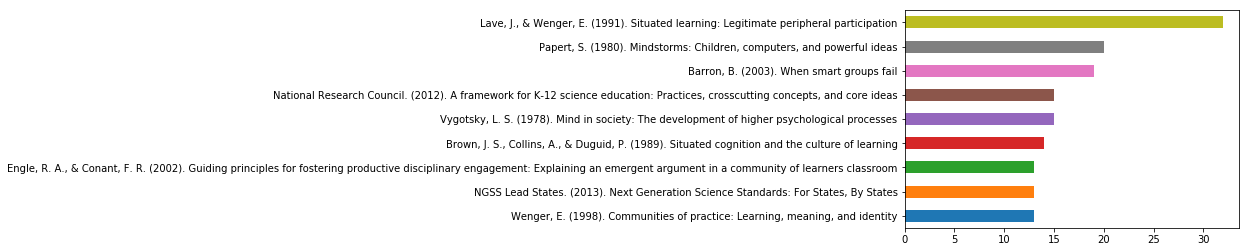

In [9]:
references.identifier.value_counts()[list(ICLS - CSCL)].sort_values().plot(kind='barh')

In [10]:
CSCL - ICLS

{'Bereiter, C. (2002). Education and mind in the knowledge age',
 'Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology'}

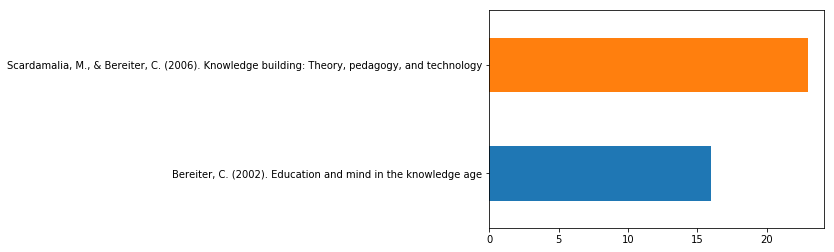

In [11]:
references.identifier.value_counts()[list(CSCL - ICLS)].sort_values().plot(kind='barh')

## We look at how the publication year of  references are distributed:

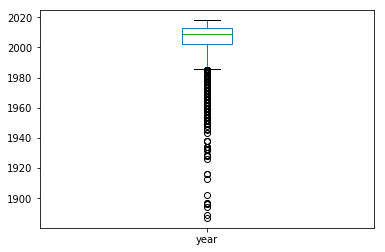

In [12]:
references.year.plot(kind='box')

We don't see much but CSCL has less early (pree 1920) outiers

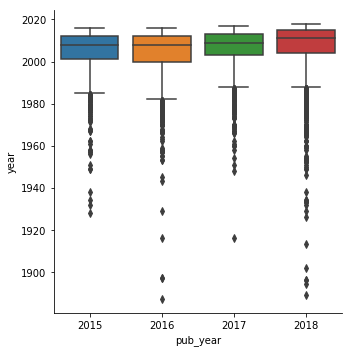

In [13]:
sns.catplot(data=references[['ref','pub_year', 'year']][~references.ref.duplicated()], x='pub_year', y='year', kind='box')

We have an interesting shift to newer sources in 2018:

In [14]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.mean()

pub_year
2015    2004.868721
2016    2004.771092
2017    2006.706161
2018    2007.508080
Name: year, dtype: float64

In [15]:
references[['ref','pub_year', 'year']][~references.ref.duplicated()].groupby('pub_year').year.median()

pub_year
2015    2008.0
2016    2008.0
2017    2009.0
2018    2011.0
Name: year, dtype: float64

## Number of authors in and out of conference being cited

In and out of conference citations, quick calculation:

In [20]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)

In [24]:
metadata = pd.read_csv('data/Parsed_metadata.csv')

In [27]:
referenced_authors = set(reference_authors.author.tolist())
authors_in_conf = set(metadata.shortend_names.map(lambda x: x.replace('.', '')))

In [29]:
print('Number of distinct authors of papers in dataset', len(authors_in_conf))
print('Number of distinct cited authors by some author in the conference ', len(referenced_authors))
print('Number of authors that where cited by an other author in the confernce :' , len(referenced_authors.intersection(authors_in_conf)))

Number of distinct authors of papers in dataset 1450
Number of distinct cited authors by some author in the conference  13278
Number of authors that where cited by an other author in the confernce : 793


Example of how one can match the string:

In [ ]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
re.search(match_conference,'bjfejf ICLS')

Find references belong to conference:

In [ ]:
mask_c_s = reference_edges.ref.map(lambda x: True if re.search(match_conference, x) else False)

In [ ]:
in_conference = set(reference_edges[mask_c_s].cited.unique())

We limit the range of years to get people that are still "active"

In [ ]:
not_in_conference = list(set(reference_edges[reference_edges.year > 2010].cited) - in_conference.union(set(reference_edges.author)))

In [ ]:
#todo: filter out organisations
# todo: deal with non overlapping names
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
# check that not in conference and is indeed author
is_human = reference_edges.dropna().cited.map(lambda x: True if reg.search(r'\p{Lu}\.',x) else False)
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (is_human)].cited.value_counts().head(20).plot(kind = 'bar')

In [ ]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Goodwin C.')].ref.sample(4).tolist()

In [ ]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Gee J. P.')].ref.sample(4).tolist()

# extracting conference, journal from refrence string

Example of how we can split up the text, which is later used to extract the conference/journal if present:

In [ ]:
text = references.sample().ref.item()
split_ref = r'(\.|\?) (?=[\p{Lu}][\p{L}])'
reg.split(split_ref, text)

We now define a regex that will catch up on words indicating a relation to a conference and then extract and clean the string to get a conference name:

_TODO: include symposium or not?_

In [ ]:
#regex to find journals or conferences
pub = '(C|c)onference|(P|p)roceedings|(j|J)ournal|(T|t)ransactions|(s|S)ymposium'
re.search(pub, text)

In [ ]:
#set to lower for better matching
match_conference = 'International Conference of (the |)Learning Sciences| JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer(-| |)Supported Collaborative Learning'
match_conference.lower()

In [ ]:
import nltk
from nltk import word_tokenize
def clean_string(x):
    
    x = x.lower() # lower to ignore case
    
    x = re.sub('[\'\"\”\/\d]*', '', x) #sub out elements that might cause same string to be diff
    x = re.sub(' & ', ' and ', x) # common spelling issue
    x = re.sub(' th | nd | rd | st | volume |—|  |-', ' ', x)
    x = re.sub(' on ', ' of ', x)
    x = x.strip()
    x = ' '.join([ z for z,y in nltk.pos_tag(word_tokenize(x)) if not y in ['CD', ':','$' ]])
    return x

In [ ]:
re.search(match_conference.lower(), clean_string('international journal of computer-supported collaborative learning'))

In [ ]:
clean_string('international journal of computer-supported collaborative learning')

In [ ]:
mask = references.ref.map(lambda x: True if 
                          (re.search(pub, x) and not
                          re.search(match_conference.lower(), clean_string(x))) else False)

In [ ]:
sources = references[mask].ref.map(lambda x: 
                            [y for y in reg.split(split_ref, x) 
                             if re.search(pub, y)
                            ][0])

In [ ]:
sources.shape

Is this CSCL ?

In [ ]:
sources[14589]

In [ ]:
sources = sources.map(lambda x: clean_string(x))

In [ ]:
def strip_garbage(s):
    r = [y.strip() for y in reg.split(r'\.|\,|\?|\;|\(|\)', s) if re.search(pub.lower(), y)]
    if len(r) > 0:
        return r[0]
    else:
        print(s)
        return None

In [ ]:
sources = sources.map(lambda x: strip_garbage(x))#.map(lambda x: x[0] if len(x) > 0 else )

In [ ]:
sources.sample(10).tolist()

Note: People like to misspell CSCL spell it in various forms..

## Most cited non  CSCL and ISCL conferences:

In [ ]:
sources.value_counts().head(20).plot(kind='bar')

In [ ]:
sources.value_counts().tail(10)

We analyze how heavy the tail is to find whether we should work on parsing the tail or not:

In [ ]:
conference_counts = sources.value_counts()

In [ ]:
conference_counts[conference_counts >= 20].sum()

In [ ]:
conference_counts[conference_counts < 20].sum()

Conclusion: As the tail accounts for a lage number of conferences better parsing might cause a shift in the most popular conferences. Hence we look into getting more uniform names

A first idea is to look at acronyms..: https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms

In [ ]:
import urllib3
from bs4 import BeautifulSoup

In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_computer_science_conference_acronyms'
http_pool = urllib3.connection_from_url(url)
r = http_pool.urlopen('GET',url)
data = r.data
soup = BeautifulSoup(data, 'html.parser')
conferences_noisy = soup.find_all('div', class_='mw-parser-output')[0].find_all('li')
abrev_df = pd.DataFrame([c.text.split(' – ') for c in conferences_noisy if reg.search('–', c.text)], columns=['abreviation', 'full_name'])

The gives us the following list:

In [ ]:
abrev_df.head()

Constricting regex for easier searching on both columns:

In [ ]:
conf_regex = ' | '.join(abrev_df.abreviation.map(lambda x: x.lower()).tolist())
conf_regex

In [ ]:
sources.map(lambda x: True if reg.search(conf_regex, x) else False).sum()

In [ ]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

In [ ]:
conf_regex = ' |'.join(abrev_df.full_name.map(lambda x: x.lower()).tolist())

In [ ]:
references.ref.map(lambda x: reg.search(conf_regex, x.lower()).group(0) if reg.search(conf_regex, x.lower()) else None).dropna().value_counts()

We see that this doesn't add tooo much information, but it also indicates that people don't really seem to cute much form computer science conferences

### Other conferences

And other idea is to look at non enlish words that come up often, they might be conference names!

In [ ]:
import enchant
#check if a word is english
d = enchant.Dict("en_US")

In [ ]:
#some issues but works well
d.check("online")

In [ ]:
potential_abv = [word[0].upper()+word[1:] for sentence in sources.map(lambda x: word_tokenize(x)).tolist() for word in sentence if not d.check(word)]

In [ ]:
pd.Series([p for p in potential_abv if not d.check(p) and len(p) > 2 and len(p) < 6]).value_counts().head(20)

### Looking at the question of creating more uniform names:

We use a similarity measure:

This works somewhat okay, but probably not worth the effort given that this doesn't make sigchi and  ... computer human interaction the same conference

In [ ]:
import difflib
difflib.SequenceMatcher(None, 'hello', 'helo').ratio()

In [ ]:
d = {}

In [ ]:
for i, row in enumerate(sources.unique()):
    for j, row_2 in enumerate(sources.unique()):
        if i > j and row != row_2:
            difference = difflib.SequenceMatcher(None, row, row_2).ratio()
            if difference > 0.9:
                if not row_2 in d.keys():
                    d[row_2] = row

In [ ]:
len(d)

As everything is fairly regular, maybe rake can give us some titles? -> pretty much the same as we get anyway -> irregular titles are really just infequent

In [ ]:
import rake
import operator

In [ ]:
rake_object = rake.Rake("data/SmartStoplist.txt", 26, 10, 10)
keywords = rake_object.run(' . '.join(sources.tolist()))
keywords

## Again looking at the difference between CSCL and ICLS - outside citations:

In [ ]:
references['conference'] = sources

In [ ]:
references['cited_in'] = references.file.map(lambda x: int(re.search('[\d]{4}',x).group(0)))

In [ ]:
references.head()

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Most cited in ICSL')
references[references.cited_in % 2 == 0].conference.value_counts().head(20).plot(kind='bar')

plt.subplot(122)
plt.title('Most cited in CSCL')
references[references.cited_in % 2 == 1].conference.value_counts().head(20).plot(kind='bar')

Top 20 Conferences in both

In [ ]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index).intersection(set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index))

Conferences in top twenty of ICLS and not CSCL

In [ ]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index)

In [ ]:
set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index)

Conferences in top twenty of CSCL and not ICLS

In [ ]:
set(references[references.cited_in % 2 == 1].conference.value_counts().head(20).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(20).index)

In [ ]:
set(references[references.cited_in % 2 == 1].conference.value_counts().head(50).index) - set(references[references.cited_in % 2 == 0].conference.value_counts().head(50).index)